# Exploring Prophet Library

 backgorund info

In [41]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# import data
df = pd.read_csv("car_sales.csv")
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


- all prophet needs to work is a date column formatted as YYYY-MM-DD and the variable you're trying to predict. 
- we have to change the format of our date column
- aftet the format is changed we have to rename the column to 'ds' for compatibility with Prophet
- I'm also going to change the name of "Price ($)" for ease of use

In [42]:
# change column dtype to datetime
df["Date"] = pd.to_datetime(df["Date"])

# reformat the order
df["Date"] = df["Date"].dt.strftime('%Y-%m-%d')

# verify
print(df["Date"].head())

0    2022-01-02
1    2022-01-02
2    2022-01-02
3    2022-01-02
4    2022-01-02
Name: Date, dtype: object


In [43]:
# rename for compatibility
df.rename(columns={"Date": "ds"}, inplace=True) 
df.rename(columns={"Price ($)": "y"}, inplace=True)

# verify
df.head()

,Car_id,ds,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,y,Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [44]:
# drop columns we won't use in this demo
df = df[["ds", "y"]]

# verify
df.head()

,ds,y
0,2022-01-02,26000
1,2022-01-02,19000
2,2022-01-02,31500
3,2022-01-02,14000
4,2022-01-02,24500


The metric we'll be using to judge the performance of this model is Mean Absolute Error (MAE). This metric is sensitive to outliers so were going to check for those in 'y' before continuing. The dataset is large enough that we'll remove any outliers.

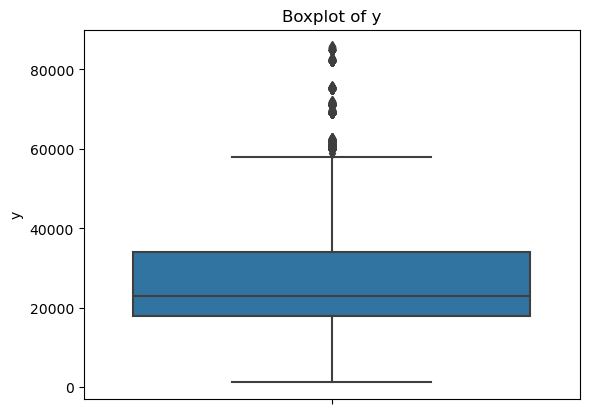

In [45]:
# check for outliers
sns.boxplot(y=df['y'])
plt.title('Boxplot of y')
plt.show()

In [47]:
df['y'].max()

57990

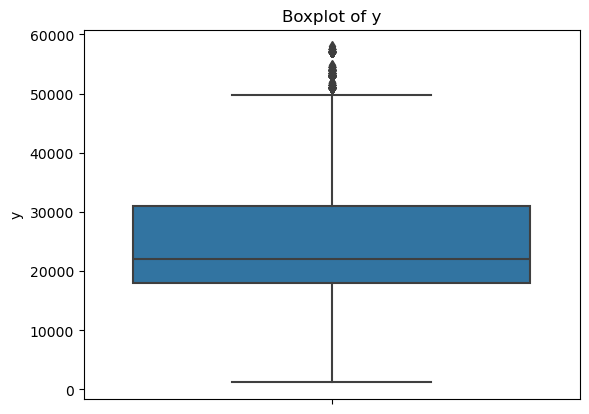

In [46]:
# set IQR boundaries
q1 = df["y"].quantile(0.25) 
q3 = df["y"].quantile(0.75)
IQR = q3 - q1

# set upper and lower bound
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# remove the outliers
df = df[(df['y'] >= lower_bound) & (df['y'] <= upper_bound)]

# reset index to account for removed rows
df.reset_index(drop=True, inplace=True)

# verify changes
sns.boxplot(y=df['y'])
plt.title('Boxplot of y')
plt.show()

The default setting of IQR, upper bound, and lower bounds didn't catch all of the outliers but it significantly reduced them. While a car price of 

Now we'll create our train and test split for the modeling. We're using a 80/20 split.

In [34]:
# set our variables
x = df["ds"]
y = df["y"]

# create training/test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2, random_state=1)
print(f"xtrain shape: {xtrain.shape}")
print(f"ytrain shape: {ytrain.shape}")
print(f"xtest shape: {xtest.shape}")
print(f"ytest shape: {ytest.shape}")

xtrain shape: (19124,)
ytrain shape: (19124,)
xtest shape: (4782,)
ytest shape: (4782,)


In [ ]:
# initialize Prophet object and fit model
model = Prophet()
model.fit(df)

11:09:43 - cmdstanpy - INFO - Chain [1] start processing
11:09:46 - cmdstanpy - INFO - Chain [1] done processing


Our latest date in this data is December 31st, 2023. Our forecasting will predict 12 months ahead so it will end December 31st, 2024.

In [ ]:
# checking the latest date
print(df["ds"].max())

2023-12-31


In [ ]:
# make predictions
future = model.make_future_dataframe(periods=12, freq='ME')  # 12 months ahead
forecast = model.predict(future)

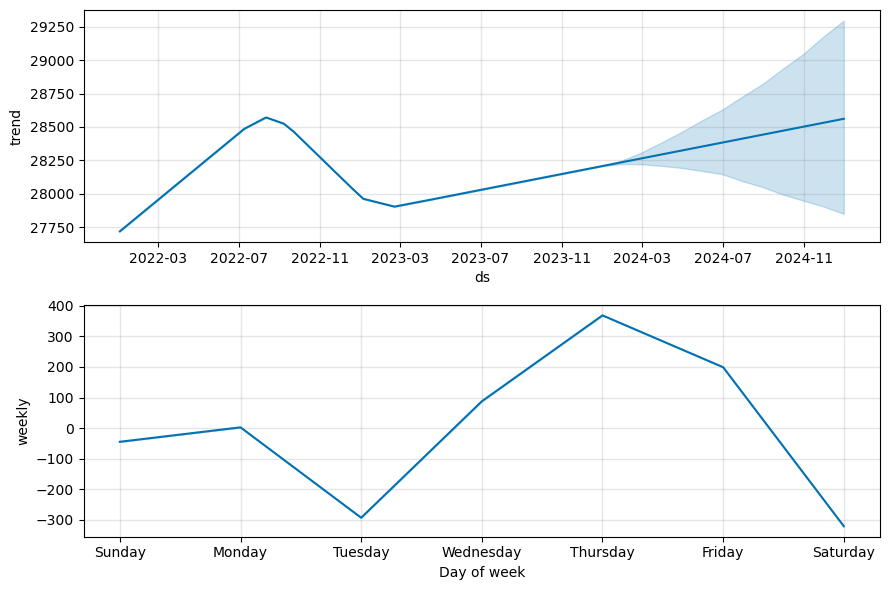

In [39]:
# plot predictions
model.plot_components(forecast)
plt.show()

Compare Forecasted from training to actuals from test

#### Analysis